In [2]:
library(e1071)
library(data.table) 
library(ggplot2)
library(dplyr)
library(e1071)
library(rpart)
library(caret)
library(tidyverse)
library(ggplot2)
library(stringr)

Warning message:
"package 'e1071' was built under R version 3.4.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Conflicts with tidy packages ---------------------------------------------------
between():   dplyr, data.table
filter():    dplyr, stats
first():     dplyr, data.table
lag():       dplyr, stats
last():      dplyr, data.table
lift():      purrr, caret
transpose(): purrr, data.table


In [1]:
colorstats <- read.csv('Stats.csv')
colorstats



Percentage.Black,Percentage.White,Percentage.Blue,Percentage.Red,Percentage.Yellow,Percentage.Purple,Percentage.Green,Percentage.Cyan,Number.of.Likes,People,X,X.1,X.2
0.818318,0.095576,0.047477,0.022866,0.004237,0.005483,0.002741,0.003302,16,1,NA,1.000000,NA
0.849782,0.087414,0.025919,0.005545,0.011651,0.004112,0.005545,0.010031,16,1,NA,0.999999,NA
0.666600,0.155867,0.025533,0.065267,0.053267,0.000267,0.000667,0.032533,30,1,NA,1.000001,NA
0.954734,0.022633,0.005658,0.003529,0.007675,0.000112,0.003305,0.002353,197,1,NA,0.999999,NA
0.744310,0.042424,0.000067,0.106465,0.105320,0.000269,0.000539,0.000606,13,1,NA,1.000000,NA
0.037063,0.676587,0.082540,0.004048,0.004206,0.063016,0.000000,0.132540,16,1,NA,1.000000,NA
0.642222,0.164175,0.005724,0.111448,0.060404,0.003300,0.011717,0.001010,39,1,NA,1.000000,NA
0.547677,0.397643,0.003771,0.031044,0.000337,0.019529,0.000000,0.000000,152,3,NA,1.000001,NA
0.420600,0.444333,0.000067,0.012600,0.094000,0.000000,0.024733,0.003667,26,1,NA,1.000000,NA
0.124667,0.633933,0.022600,0.055200,0.082533,0.003267,0.007867,0.069933,832,8,NA,1.000000,NA


ERROR: Error in filter_impl(.data, quo): Evaluation error: 3 arguments passed to 'is.na' which requires 1.


In [3]:
colorstats %>%
  select(Percentage.Black, Percentage.White, Number.of.Likes) ->stat

stat %>% drop_na() ->cs
cs

Percentage.Black,Percentage.White,Number.of.Likes
0.818318,0.095576,16
0.849782,0.087414,16
0.666600,0.155867,30
0.954734,0.022633,197
0.744310,0.042424,13
0.037063,0.676587,16
0.642222,0.164175,39
0.547677,0.397643,152
0.420600,0.444333,26
0.124667,0.633933,832


In [37]:
likes = (cs$Number.of.Likes)

mean = mean(likes)

cs$OverMean = ((as.data.frame(cs$Number.of.Likes))>mean)

In [38]:
cs

Percentage.Black,Percentage.White,Number.of.Likes,OverMean
0.818318,0.095576,16,FALSE
0.849782,0.087414,16,FALSE
0.666600,0.155867,30,FALSE
0.954734,0.022633,197,TRUE
0.744310,0.042424,13,FALSE
0.037063,0.676587,16,FALSE
0.642222,0.164175,39,FALSE
0.547677,0.397643,152,TRUE
0.420600,0.444333,26,FALSE
0.124667,0.633933,832,TRUE


In [32]:
summary(cs)
str(cs)

 Percentage.Black Percentage.White  Number.of.Likes  
 Min.   :0.0000   Min.   :0.00000   Min.   :   1.00  
 1st Qu.:0.2234   1st Qu.:0.09813   1st Qu.:  12.00  
 Median :0.4817   Median :0.25860   Median :  21.00  
 Mean   :0.4762   Mean   :0.32640   Mean   :  40.35  
 3rd Qu.:0.7176   3rd Qu.:0.51547   3rd Qu.:  30.00  
 Max.   :0.9970   Max.   :0.99113   Max.   :1666.00  
 OverMean.cs$Number.of.Likes
 Mode :logical              
 FALSE:871                  
 TRUE :134                  
                            
                            
                            

'data.frame':	1005 obs. of  4 variables:
 $ Percentage.Black: num  0.818 0.85 0.667 0.955 0.744 ...
 $ Percentage.White: num  0.0956 0.0874 0.1559 0.0226 0.0424 ...
 $ Number.of.Likes : int  16 16 30 197 13 16 39 152 26 832 ...
 $ OverMean        : logi [1:1005, 1] FALSE FALSE FALSE TRUE FALSE FALSE ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr "cs$Number.of.Likes"


In [39]:
cs$OverMean = as.integer(cs$OverMean)
head(cs)

Percentage.Black,Percentage.White,Number.of.Likes,OverMean
0.818318,0.095576,16,0
0.849782,0.087414,16,0
0.666600,0.155867,30,0
0.954734,0.022633,197,1
0.744310,0.042424,13,0
0.037063,0.676587,16,0



Call:
svm(formula = OverMean ~ Percentage.Black + Percentage.White, data = cs, 
    kernel = "linear", cost = 1e+15)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+15 
      gamma:  0.5 

Number of Support Vectors:  245


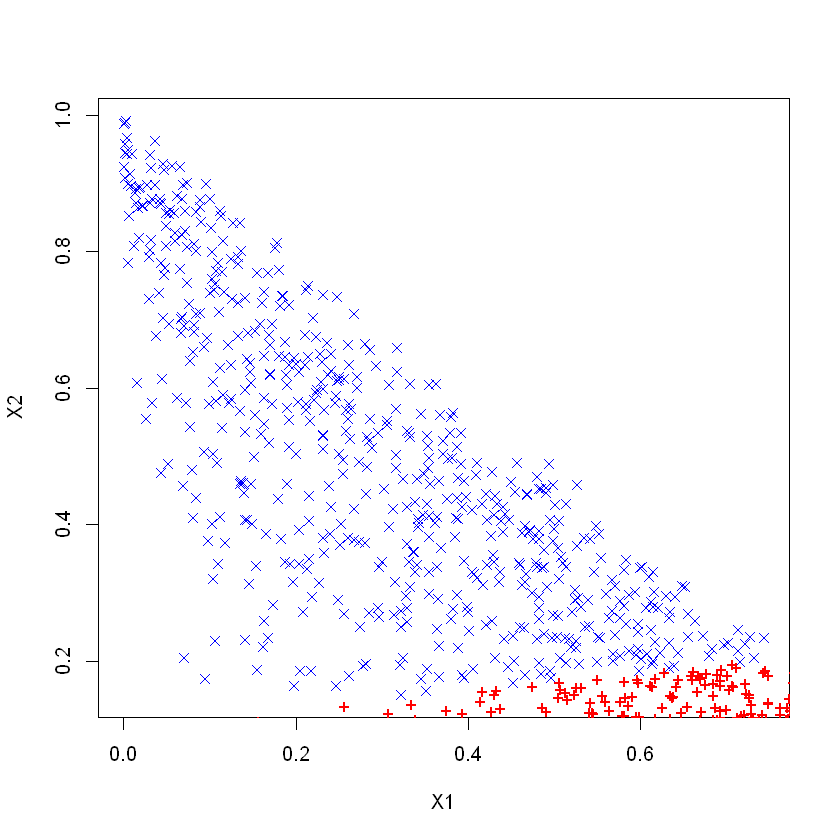

In [63]:
cs$OverMean = as.factor(cs$OverMean)
svm.fit = svm(OverMean ~ Percentage.Black + Percentage.White, cs, kernel = "linear", cost = 1000000000000001)
preds = predict(svm.fit, cs)
#preds
#plot(svm.fit,cs)
svm.fit
plot(cs[preds == 0, ]$Percentage.Black, cs[preds ==0, ]$Percentage.White, col = "blue", pch = 4, xlab = "X1", ylab = "X2")
points(cs[preds == 1, ]$Percentage.Black, cs[preds == 1, ]$Percentage.White, col = "red", pch = "+")
#points(cs[preds == 5, ]$Percentage.Black, cs[preds == 5, ]$Percentage.White, col = "red", pch = "+")
#points(cs[preds == 20, ]$Percentage.Black, cs[preds == 20, ]$Percentage.White,  col = "blue", pch = 4)

In [34]:
cs

Percentage.Black,Percentage.White,Number.of.Likes,OverMean
0.818318,0.095576,16,FALSE
0.849782,0.087414,16,FALSE
0.666600,0.155867,30,FALSE
0.954734,0.022633,197,TRUE
0.744310,0.042424,13,FALSE
0.037063,0.676587,16,FALSE
0.642222,0.164175,39,FALSE
0.547677,0.397643,152,TRUE
0.420600,0.444333,26,FALSE
0.124667,0.633933,832,TRUE


In [48]:

library(forcats)
#cs$Number.of.Likes = as.numeric(cs$Number.of.Likes)
#levels(cs$Number.of.Likes) = c("0","1")

#str(cs)
#svm.fit = svm(as.factor(cs$Number.of.Likes) ~ Percentage.Black + Percentage.White, cs, gamma = 1)
#svm.pred = predict(svm.fit, cs)
#data.pos = cs[svm.pred > 16, ]
#data.neg = cs[svm.pred <= 16, ]

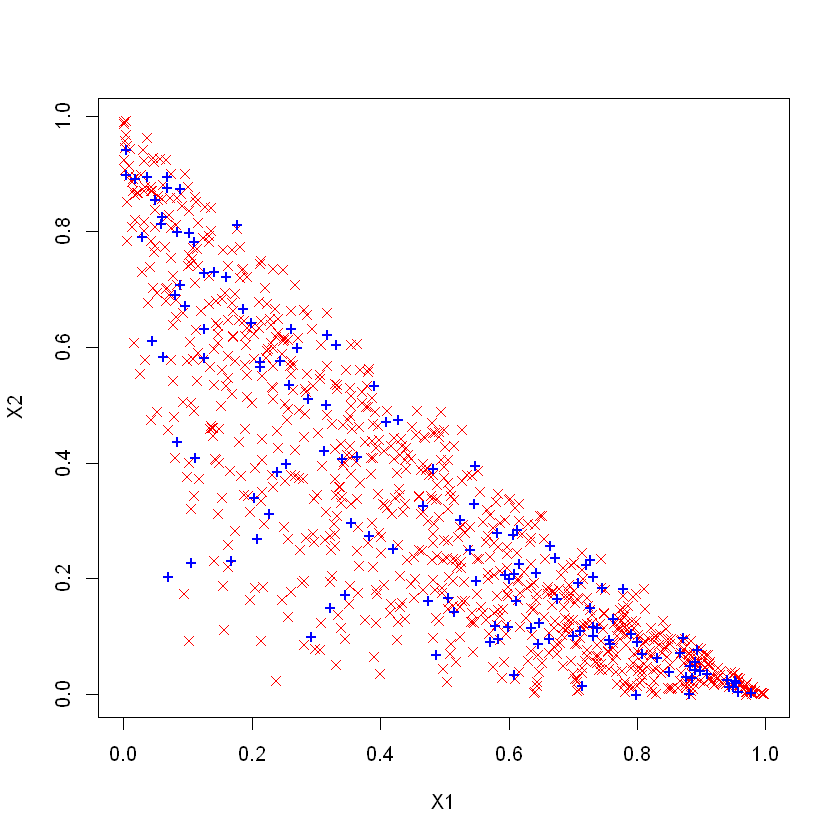

In [57]:
svmnl.fit = svm(OverMean ~ Percentage.Black + Percentage.White, cs, kernel = "radial", gamma = 100000)
preds = predict(svmnl.fit, cs)
plot(cs[preds == 0, ]$Percentage.Black, cs[preds == 0, ]$Percentage.White, col = "red", pch = 4, xlab = "X1", ylab = "X2")
points(cs[preds == 1, ]$Percentage.Black, cs[preds == 1, ]$Percentage.White, col = "blue", pch = "+")


In [65]:
plot(cs$Percentage.Black[Number.of.Likes == 0], cs$Percentage.White[Number.of.Likes==0],
     col = "red", xlab = "X1", ylab = "X2", pch = "+")
#points(cs[Number.of.Likes == 3]$Percentage.Black, cs[Number.of.Likes == 3]$Percentage.White, col = "blue", pch = 4)

ERROR: Error in plot(cs$Percentage.Black[Number.of.Likes == 0], cs$Percentage.White[Number.of.Likes == : object 'Number.of.Likes' not found


In [66]:
svm.fit = svm(as.factor(cs$Number.of.Likes) ~ Percentage.Black + Percentage.White, cs, gamma = 1)
svm.pred = predict(svm.fit, cs)
data.pos = cs[svm.pred == "A", ]
data.neg = cs[svm.pred == "B", ]

Warning message in min(x):
"no non-missing arguments to min; returning Inf"Warning message in max(x):
"no non-missing arguments to max; returning -Inf"Warning message in min(x):
"no non-missing arguments to min; returning Inf"Warning message in max(x):
"no non-missing arguments to max; returning -Inf"

ERROR: Error in plot.window(...): need finite 'xlim' values


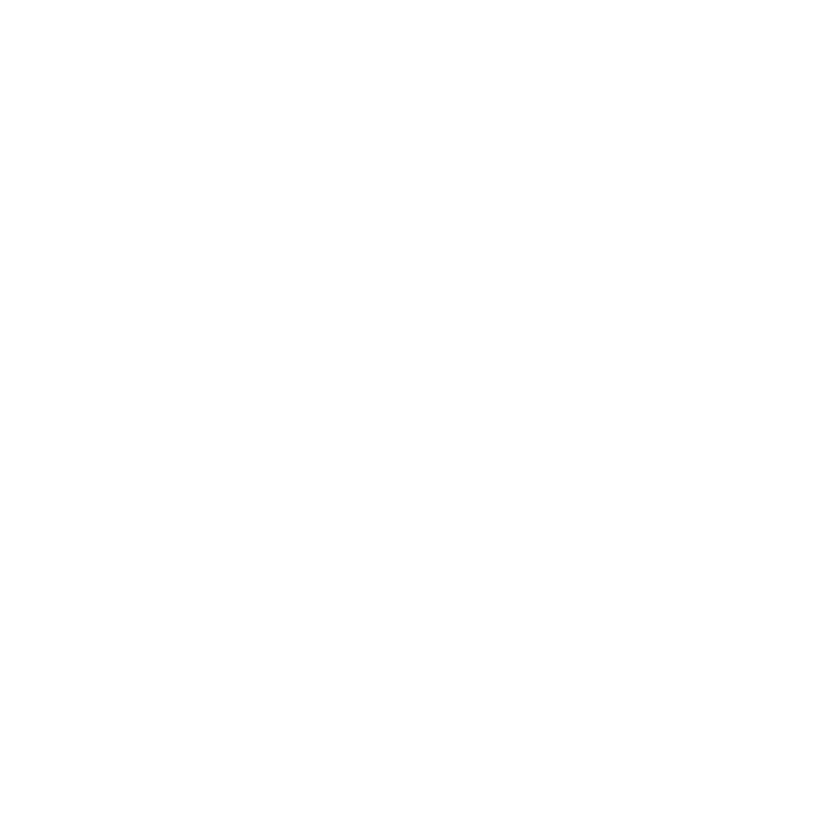

In [67]:
plot(data.pos$Percentage.Black, data.pos$Percentage.White, col = "blue", xlab = "X1", ylab = "X2", pch = "+")
points(data.neg$Percentage.Black, data.neg$Percentage.White, col = "red", pch = 4)